In [1]:
import numpy as np
from skimage import io,  util
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.color import rgb2gray


Mean images in npy format

In [3]:
test_image_Mp =np.load('/Users/siravani/Documents/LC-MSRealData/\
Using a Spike-In Experiment to Evaluate Analysis of LC-MS Data/\
openms/mzml/TOPPAS_out/003-FileConverter-out/\
images_mz300-1300_RT140/mean_spike_in.npy')

test_image_noMp = np.load('/Users/siravani/Documents/\
LC-MSRealData/Using a Spike-In Experiment to Evaluate Analysis of LC-MS Data/\
openms/mzml/TOPPAS_out/\
003-FileConverter-out/images_mz300-1300_RT140/mean_spike_no.npy')


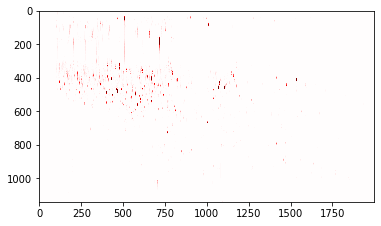

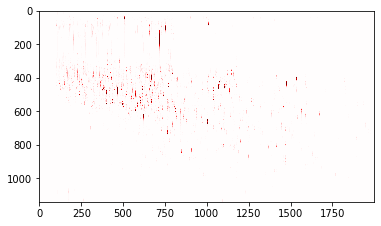

In [4]:
plt.figure()
plt.imshow(test_image_Mp,cmap="seismic", clim=(-1000,1000))
plt.figure()
plt.imshow(test_image_noMp,cmap="seismic", clim=(-1000,1000))


mean of the interpretation of the images in the mp group on the network that has been trained on the numpy matrix

Interpretation on the mean 

In [7]:
Interpretation_Mp_npy= np.load('/Users/siravani/Documents/LC-MSRealData/\
Using a Spike-In Experiment to Evaluate Analysis of LC-MS Data/openms/mzml/\
TOPPAS_out/003-FileConverter-out/images_mz300-1300_RT140/\
costomizeImages-3-npy-scratch-train-interpretation/\
Interpretation-of-mean/lrp.zmean_spike_in.npy.npy')

Interpretation_noMp_npy=np.load('/Users/siravani/Documents/LC-MSRealData/\
Using a Spike-In Experiment to Evaluate Analysis of LC-MS Data/openms/mzml/\
TOPPAS_out/003-FileConverter-out/images_mz300-1300_RT140/\
costomizeImages-3-npy-scratch-train-interpretation/\
Interpretation-of-mean/lrp.zmean_spike_no.npy.npy')

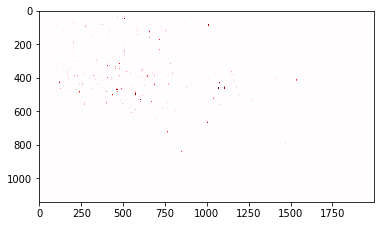

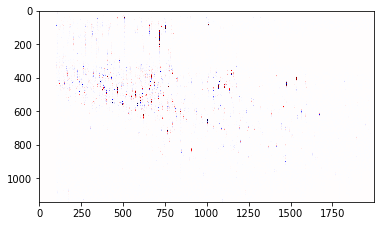

In [8]:
plt.figure()
plt.imshow(Interpretation_Mp_npy,cmap="seismic", clim=(-0.1, 0.1))

plt.figure()
plt.imshow(Interpretation_noMp_npy,cmap="seismic", clim=(-0.1, 0.1))


In [9]:
indices = []
w=13
h=2
data = np.copy(Interpretation_Mp_npy)
for i in range(40000):
    ind = np.unravel_index(np.argmax(data, axis=None), data.shape) 
    #prdefined widow (w,h), filter data<2
    if (ind[0]>w and ind[1]>h and data[ind]!=0 and test_image_Mp[ind]>2):
        data[ind[0]-w:ind[0]+w, ind[1]-h:ind[1]+h] =0
        indices.append(ind)
    else:
        data[ind[0], ind[1]] =0
np.shape(indices) 

(8044, 2)

In [11]:
indices_improved = []
data_improved = np.copy(Interpretation_Mp_npy)
for i in range(40000):
    ind = np.unravel_index(np.argmax(data_improved, axis=None), data.shape) 
    #Healthy interpretation, filter data<2, diseases interpretation
    if (ind[0]>w and ind[1]>h and data_improved[ind]!=0 and test_image_Mp[ind]>2 and Interpretation_noMp_npy[ind[0], ind[1]]>=0): 
        data_improved[ind[0]-w:ind[0]+w, ind[1]-h:ind[1]+h] =0
        indices_improved.append(ind)
    else:
        data_improved[ind[0], ind[1]] =0
        
np.shape(indices_improved)

(6992, 2)

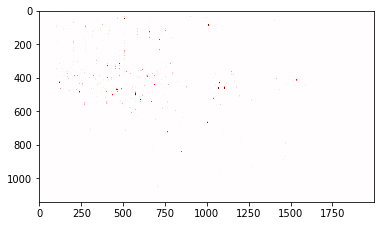

In [12]:
data = np.copy(test_image_Mp)
# data = np.copy(Interpretation_22pep)

Interpretation_importance = np.zeros((test_image_Mp.shape))
indices_ = indices_improved#with_ttest#_improved
# for i in range(795):
for i in range(np.shape(indices_)[0]):
    #the predefined window
    if (indices_[i][0]>1w and indices_[i][1]>h):
        Interpretation_importance [ indices_[i][0]-w:indices_[i][0]+w, indices_[i][1]-h:indices_[i][1]+h] = \
        Interpretation_Mp_npy[indices_[i][0]-w:indices_[i][0]+w, indices_[i][1]-h:indices_[i][1]+h]
    else:
        Interpretation_importance [ indices_[i][0], indices_[i][1]] = \
        Interpretation_Mp_npy[indices_[i][0], indices_[i][1] ]
plt.figure()
plt.imshow(Interpretation_importance, cmap="seismic", clim=(-0.1, 0.1))


In [ ]:
def round_of_rating(number,rate):
    return round(number * rate) / rate

def plot_spike_contrast(ts,te, mz, rate, ylim):
    ts=int(ts*60)
    te = int(te*60)
    mz = mz
    rate = rate
    fig , (ax1,ax2) = plt.subplots(1,2, figsize = ( 9,3))
    ax1.set_title('mz='+str(mz)+ '(MP)')
    ax1.set(xlabel='RT', ylabel= 'Intensity')
    ax1.set_ylim(top=ylim)
    
    xmin= int(np.floor( ts/7 ))
    xmax= int(np.floor( te/7 ))
    ax1.plot(range(xmin,xmax),\
             10000*Interpretation_importance[xmin:xmax,int(round_of_rating(mz,rate)*rate)], 'blue')
    ax1.plot(range(xmin,xmax),\
             test_image_Mp[xmin:xmax,int(round_of_rating(mz,rate)*rate)], 'darkred')

    ax2.set_title('mz='+str(mz)+ '(noMP)')
    ax2.set(xlabel='RT', ylabel= 'Intensity')
    ax2.set_ylim(top=ylim)
    ax2.plot(range(xmin,xmax),\
             10000*Interpretation_noMp_npy[xmin:xmax,int(round_of_rating(mz,rate)*rate)], 'blue')
    ax2.plot(range(xmin,xmax),\
             test_image_noMp[xmin:xmax,int(round_of_rating(mz,rate)*rate)],'darkred')


Visualize the interpretations around the spike-in peptides in healthy and diseased samples

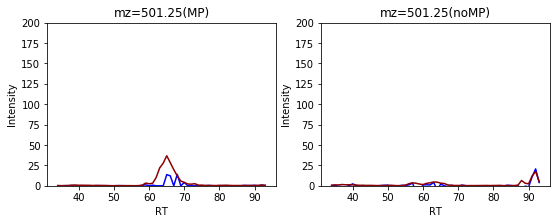

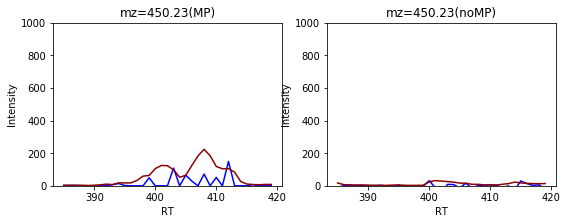

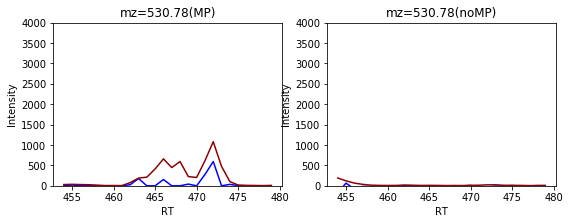

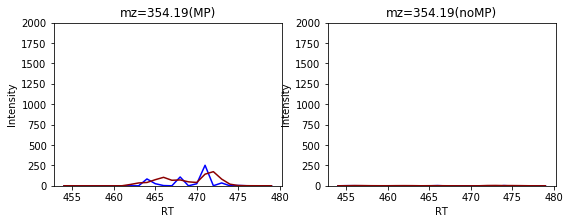

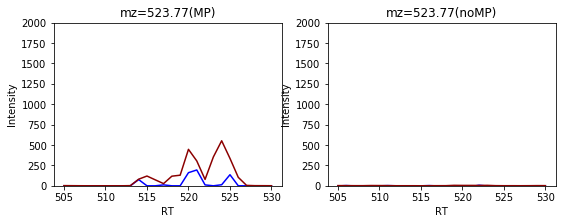

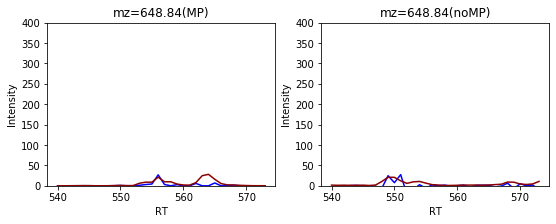

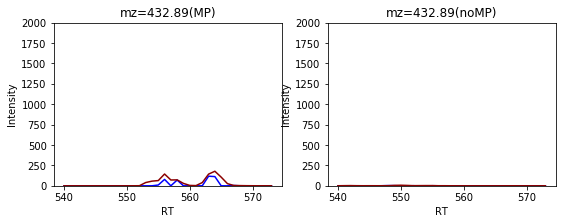

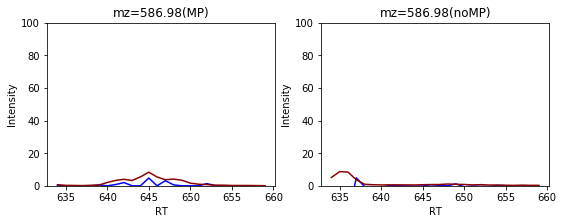

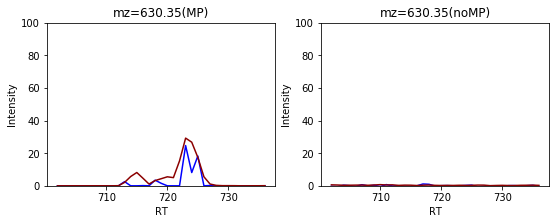

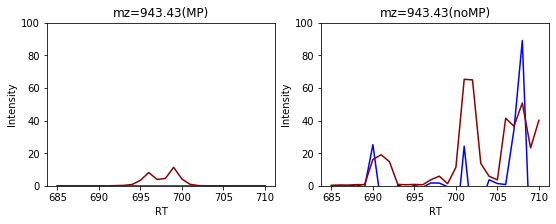

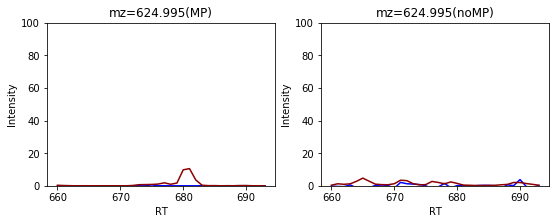

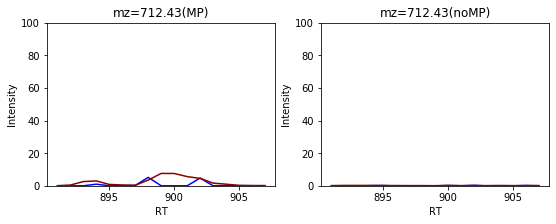

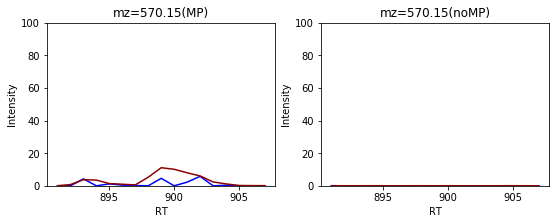

In [215]:
rate=2
plot_spike_contrast(ts=4, te=11, mz=501.25, rate=rate , ylim= 200)
plot_spike_contrast(ts=45, te=49, mz=450.23, rate=rate, ylim= 1000)
plot_spike_contrast(ts=53, te=56, mz=530.78, rate=rate , ylim= 4000)
plot_spike_contrast(ts=53, te=56, mz=354.19, rate=rate , ylim= 2000)
plot_spike_contrast(ts=59, te=62, mz=523.77, rate=rate , ylim= 2000)
plot_spike_contrast(ts=63 , te=67, mz= 648.84, rate=rate , ylim= 400)
plot_spike_contrast(ts=63 , te=67, mz= 432.89, rate=rate , ylim= 2000)
plot_spike_contrast(ts=74, te=77, mz= 586.98 , rate=rate , ylim= 100)
plot_spike_contrast(ts=82 , te=86, mz= 630.35, rate=rate , ylim= 100)
plot_spike_contrast(ts=80 , te=83, mz= 943.43, rate=rate , ylim= 100)
plot_spike_contrast(ts=77 , te=81, mz= 624.995, rate=rate , ylim= 100)
plot_spike_contrast(ts=104 , te=106, mz= 712.43, rate=rate , ylim= 100)
plot_spike_contrast(ts=104 , te=106, mz= 570.15, rate=rate , ylim= 100)



In [14]:
import os
filedir = '/Users/siravani/Documents/LC-MSRealData/\
Using a Spike-In Experiment to Evaluate Analysis of LC-MS Data/\
openms/mzml/TOPPAS_out/003-FileConverter-out/images_mz300-1300_RT140/all-npy/'

Image_Mp_npy_list=[]
Image_noMp_npy_list=[]
file_list = os.listdir(filedir)
for file in file_list:
    if (file.endswith('.npy')) and ('_MPrep' in file) :
        IM = np.load(os.path.join(filedir,file))
        Image_Mp_npy_list.append(IM)
    elif (file.endswith('.npy')) and ('_noMP' in file):
        IM = np.load(os.path.join(filedir,file))
        Image_noMp_npy_list.append(IM)
        
        

Multiple testing

In [16]:
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [17]:

indices_ = np.copy(indices_improved)
indices_with_ttest=[]
P_vals =[]
for ind in indices_:
    data_stat_mp=0
    data_stat_nomp=0
    for im_mp,im_nomp in zip(Image_Mp_npy_list, Image_noMp_npy_list):
        data_stat_mp= data_stat_mp + im_mp[ind[0]-w:ind[0]+w, ind[1]] 
        data_stat_nomp= data_stat_nomp + im_nomp[ind[0]-w:ind[0]+w, ind[1]] 
    t, p = stats.ttest_ind(data_stat_mp, data_stat_nomp)
    P_vals.append(p)  

In [18]:
np.shape(P_vals)


(6992,)

Text(0.5, 0, 'p-value')

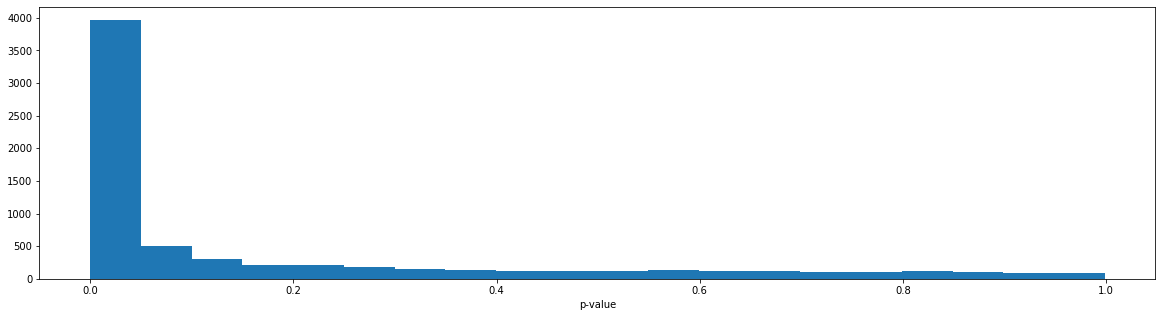

In [28]:
plt.figure(figsize=(20,5))
plt.hist(P_vals, bins=20)
plt.xlabel('p-value')


(array([3498.,  566.,  348.,  270.,  203.,  174.,  182.,  155.,  124.,
         131.,  116.,  136.,  129.,  155.,  148.,  123.,  135.,  153.,
         117.,  129.]),
 array([1.17166422e-39, 4.99322775e-02, 9.98645549e-02, 1.49796832e-01,
        1.99729110e-01, 2.49661387e-01, 2.99593665e-01, 3.49525942e-01,
        3.99458220e-01, 4.49390497e-01, 4.99322775e-01, 5.49255052e-01,
        5.99187330e-01, 6.49119607e-01, 6.99051885e-01, 7.48984162e-01,
        7.98916440e-01, 8.48848717e-01, 8.98780994e-01, 9.48713272e-01,
        9.98645549e-01]),
 <a list of 20 Patch objects>)

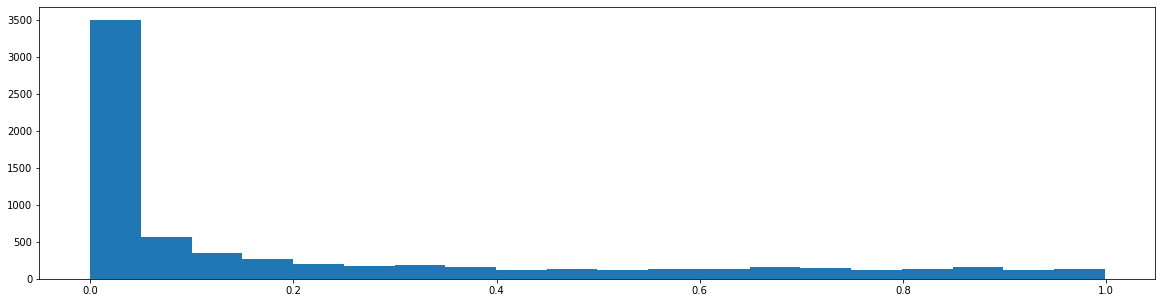

In [21]:
P_corrected = multipletests(P_vals, method = 'fdr_bh')
P_corrected
plt.figure(figsize=(20,5))
plt.hist(P_corrected[1], bins=20)


In [41]:
np.count_nonzero(np.where(P_corrected[1]<=0.05))


3499

In [42]:
ind_new=[]
for c, ind in enumerate(indices_improved):
    if P_corrected[1][c]<=0.05:
        ind_new.append(indices_improved[c])
        

In [46]:
# np.save('indices_with_ttest.npy', indices_with_ttest)


In [54]:
# indices_ = np.copy(indices)
indices_with_ttest=[]
for ind in ind_new:
    data_stat_mp=0
    data_stat_nomp=0
    for im_mp,im_nomp in zip(Image_Mp_npy_list, Image_noMp_npy_list):
        data_stat_mp= data_stat_mp + im_mp[ind[0]-w:ind[0]+w, ind[1]] 
        data_stat_nomp= data_stat_nomp + im_nomp[ind[0]-w:ind[0]+w, ind[1]] 
    FC = np.max(data_stat_mp)/np.max(data_stat_nomp)
    if FC>10:
        indices_with_ttest.append([ind[0],ind[1]])
        
    

In [55]:

np.shape(indices_with_ttest)


(195, 2)